In [9]:
import pandas as pd
from sqlalchemy import create_engine
from scipy.stats import ttest_ind
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt

In [4]:
load_dotenv()
db_url = os.getenv("DATA_URL")

In [5]:
query = """
SELECT
    startdatetime,
    userid,
    calltype,
    disconnecttype,
    total_handle_time,
    total_hold_time,
    total_talk_time,
    total_survey,
    average_of_average_survey
FROM call_schema.call_data;
"""

In [7]:
engine = create_engine(db_url)

In [8]:
df = pd.read_sql(query, engine)

In [10]:
df["disconnecttype"] = df["disconnecttype"].fillna("unknown")

Correlation (Hold Time vs Handle Time): 0.7524607254506327


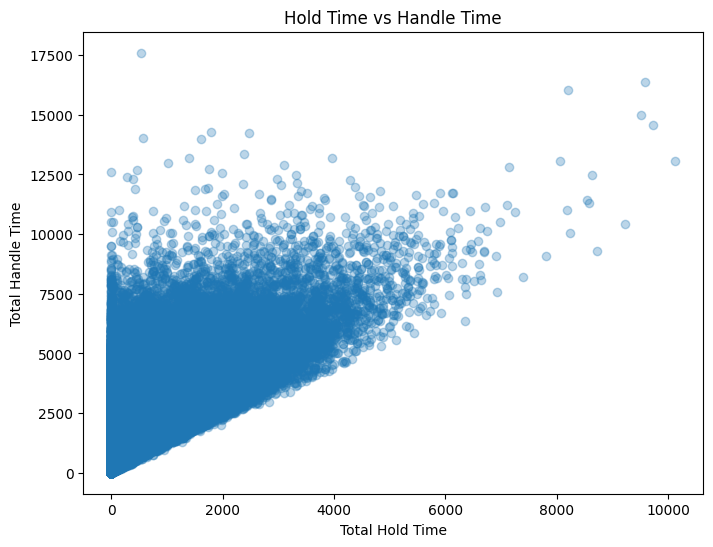

In [11]:
hold_handle_corr = df["total_hold_time"].corr(df["total_handle_time"])
print("Correlation (Hold Time vs Handle Time):", hold_handle_corr)

plt.figure(figsize=(8, 6))
plt.scatter(df["total_hold_time"], df["total_handle_time"], alpha=0.3)
plt.xlabel("Total Hold Time")
plt.ylabel("Total Handle Time")
plt.title("Hold Time vs Handle Time")
plt.show()

Correlation (Hold Time vs Talk Time): 0.4474664665602769


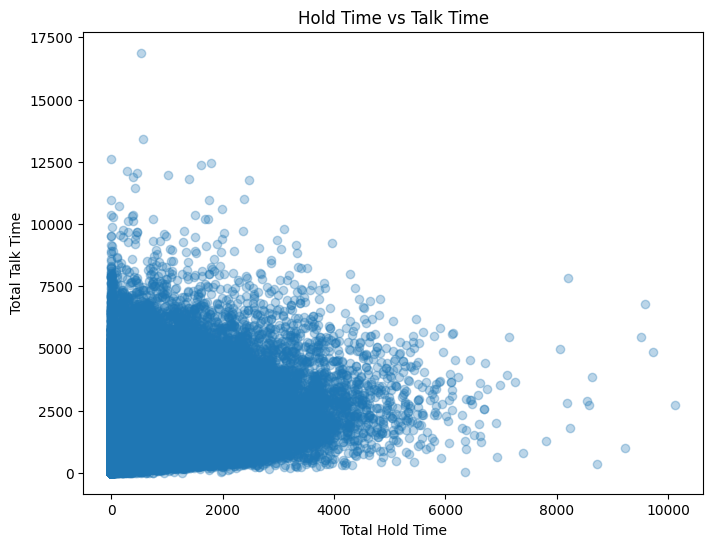

In [12]:
hold_talk_corr = df["total_hold_time"].corr(df["total_talk_time"])
print("Correlation (Hold Time vs Talk Time):", hold_talk_corr)

plt.figure(figsize=(8, 6))
plt.scatter(df["total_hold_time"], df["total_talk_time"], alpha=0.3)
plt.xlabel("Total Hold Time")
plt.ylabel("Total Talk Time")
plt.title("Hold Time vs Talk Time")
plt.show()


Average Survey Score by Disconnect Type:
disconnecttype
transfer              2.628222
client                2.202382
unknown               0.243945
endpoint              0.161683
error                 0.153846
conferenceTransfer    0.104167
peer                  0.035573
Name: average_of_average_survey, dtype: float64


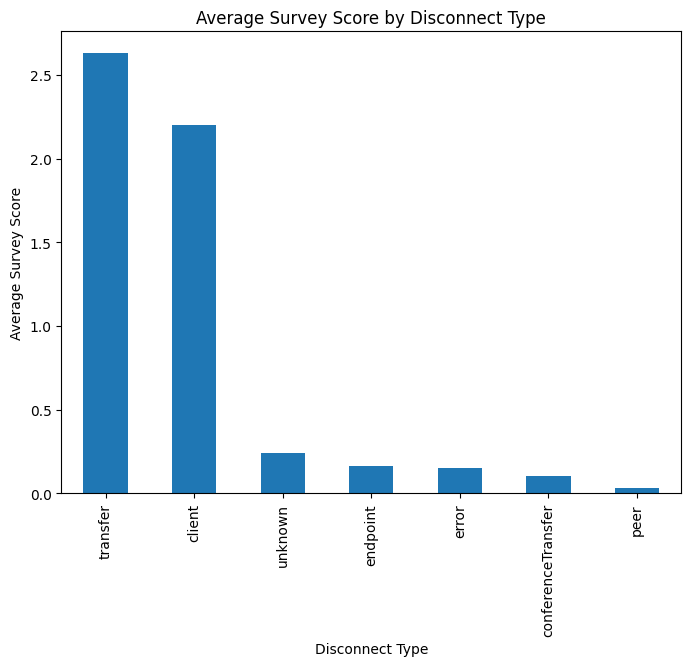

In [13]:
survey_by_disconnect = (
    df.groupby("disconnecttype")["average_of_average_survey"]
    .mean()
    .sort_values(ascending=False)
)

print("\nAverage Survey Score by Disconnect Type:")
print(survey_by_disconnect)

plt.figure(figsize=(8, 6))
survey_by_disconnect.plot(kind="bar")
plt.xlabel("Disconnect Type")
plt.ylabel("Average Survey Score")
plt.title("Average Survey Score by Disconnect Type")
plt.show()


Average Hold Time by Disconnect Type:
disconnecttype
conferenceTransfer    591.772708
error                 371.551897
transfer              323.818411
client                250.777376
peer                  227.768654
endpoint              187.511354
unknown               159.890830
Name: total_hold_time, dtype: float64


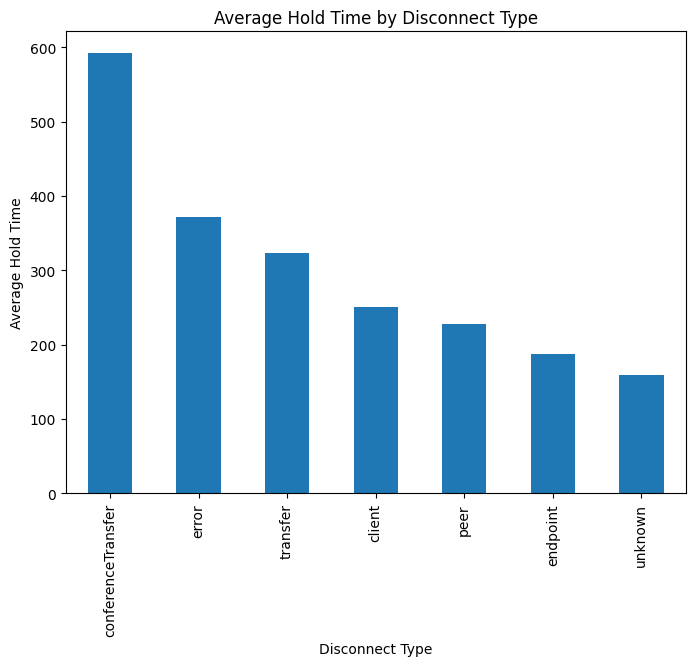

In [14]:
hold_by_disconnect = (
    df.groupby("disconnecttype")["total_hold_time"]
    .mean()
    .sort_values(ascending=False)
)

print("\nAverage Hold Time by Disconnect Type:")
print(hold_by_disconnect)

plt.figure(figsize=(8, 6))
hold_by_disconnect.plot(kind="bar")
plt.xlabel("Disconnect Type")
plt.ylabel("Average Hold Time")
plt.title("Average Hold Time by Disconnect Type")
plt.show()

In [15]:
client_hold = df[df["disconnecttype"] == "client"]["total_hold_time"]
peer_hold = df[df["disconnecttype"] == "peer"]["total_hold_time"]

ttest_result = ttest_ind(client_hold, peer_hold, equal_var=False)
print("\nT-test (Client vs Peer Hold Time):")
print(ttest_result)


T-test (Client vs Peer Hold Time):
TtestResult(statistic=np.float64(18.677337864369044), pvalue=np.float64(8.118838408587439e-78), df=np.float64(437034.90457054443))
